In [2]:
%pip install SpeechRecognition
%pip install librosa
%pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 3.9 MB/s eta 0:00:0000:0100:01
DEPRECATION: deeplodocus 0.3.0 has a non-standard dependency specifier psutil>=5-4.8. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of deeplodocus or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: deeplodocus 0.3.0 has a non-standard dependency specifier psutil>=5-4.8. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of deeplodocus or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: deeplodocus 0.3.0 has

In [2]:
# 필요한 라이브러리 
import matplotlib.pyplot as plt
import speech_recognition as sr
import librosa

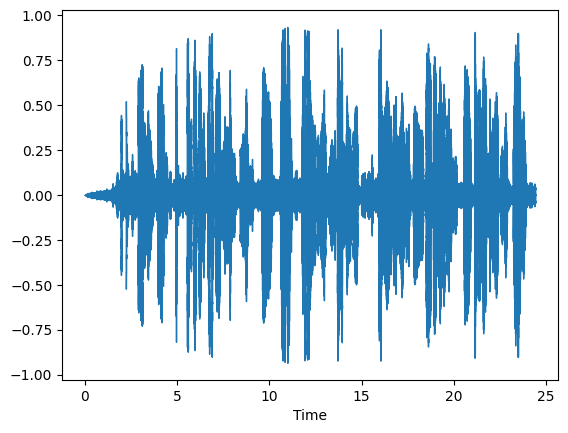

In [16]:
# 파형 나타내기
import librosa.display as dsp
data, sample_rate = librosa.load('./sumin_audio.wav')

dsp.waveshow(data,sr=sample_rate)
plt.show()

# 소리 재생해보고 싶을때
from IPython.display import Audio
Audio(data=data,rate=sample_rate)

### 1. Speech-to-Text

In [10]:
# 한국어로 STT 변환
r = sr.Recognizer()
korean_audio = sr.AudioFile('./sumin_audio.wav')

with korean_audio as source:
    audio = r.record(source)

text = r.recognize_google(audio_data=audio, language='ko-KR',)
print(text)

result2:
{   'alternative': [   {   'confidence': 0.87048703,
                           'transcript': '안녕하세요 저는 열정 피해를 담당하고 있는 심수민 무슨 말을 해야 '
                                         '할지 모르겠지만 일단 아무 말이나 해 보겠습니다 지금 주변에 '
                                         '상당히 시끄러운데요 녹음이 잘 될는지 모르겠네요 아무튼 만나서 '
                                         '반가웠습니다 안녕히 계세요'},
                       {   'transcript': '안녕하세요 저는 열정 피해를 담당하고 있는 신수민 무슨 말을 해야 '
                                         '할지 모르겠지만 일단 아무 말이나 해 보겠습니다 지금 주변에 '
                                         '상당히 시끄러운데요 녹음이 잘 될는지 모르겠네요 아무튼 만나서 '
                                         '반가웠습니다 안녕히 계세요'},
                       {   'transcript': '안녕하세요 저는 열정 피해를 담당하고 있는 심수민 어 무슨 말을 '
                                         '해야 할지 모르겠지만 일단 아무 말이나 해 보겠습니다 지금 주변에 '
                                         '상당히 시끄러운데요 녹음이 잘 될는지 모르겠네요 아무튼 만나서 '
                                         '반가웠습니다 안녕히 계세요'},
                       {   'transcript': '

### 2. 말의 빠르기 측정하기
기준 : wpm (words per minute, 분당 단어)
- 100 ~ 182wpm : 느림
- 183 ~ 260wpm : 평균
- 260 ~ wpm : 빠름

In [19]:
# 단어 수를 리턴하는 함수
def my_count_word(text):
    length = len(text)
    count = 0
    for x in range (length):
        # 빈칸일 경우 단어로 카운드!
        if text[x] == ' ':
            if x != 0:
                count = count + 1
        # 마지막 단어 카운드!
        elif x == length - 1:
            count = count + 1
    return count

cnt = my_count_word(text)
print(cnt)

30


In [25]:
# 오디오 길이 재기
import wave
def get_duration(audio_path):
    audio = wave.open(audio_path)
    frames = audio.getnframes()
    rate = audio.getframerate()
    duration = frames / float(rate)
    return duration

duration = get_duration('./sumin_audio.wav')
print(duration)

24.426666666666666


In [26]:
#wpm 계산하기
wpm = cnt / duration * 60
print(wpm)

73.68995633187774


### 3. 발음평가
사용자가 스크립트를 입력하면, 
- 음성 : 얼마만큼 발음하고 일치하는지 평가
- 텍스트 : 너무 중복되는 말은 없는지, 맞춤법 틀린 것은 없는지 체크